In [13]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score,
    classification_report, confusion_matrix, roc_curve
)
import numpy as np

In [14]:
# Load the dataset
df = pd.read_csv("flight_delay_prediction_dataset.csv")

In [17]:
# Label encode categorical columns
le = LabelEncoder()
df_model["Airline"] = le.fit_transform(df_model["Airline"])
df_model["Origin_Airport"] = le.fit_transform(df_model["Origin_Airport"])
df_model["Destination_Airport"] = le.fit_transform(df_model["Destination_Airport"])
df_model["Weather_Conditions"] = le.fit_transform(df_model["Weather_Conditions"])

In [16]:
# Drop unnecessary columns
df_model = df.drop(columns=["Flight_ID", "Flight_Date", "Flight_Status"])

EDA - Explploratory Data Analysis

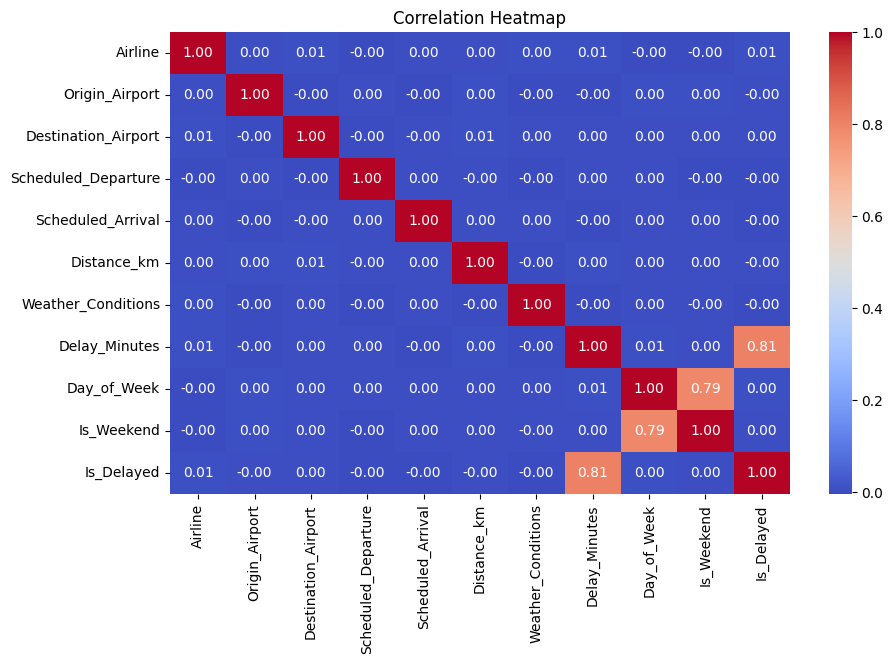

In [19]:
# EDA: correlation heatmap
plt.figure(figsize=(10, 6))
# Generate the heatmap using df_model instead of df
sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Classification Model

In [20]:
print("\n--- CLASSIFICATION: Predict if Delayed ---")
X_clf = df_model.drop(columns=["Is_Delayed", "Delay_Minutes"])
y_clf = df_model["Is_Delayed"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)
y_proba_clf = clf_model.predict_proba(X_test_clf)[:, 1]


--- CLASSIFICATION: Predict if Delayed ---


In [21]:
# Classification Metrics
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("Precision:", precision_score(y_test_clf, y_pred_clf))
print("Recall:", recall_score(y_test_clf, y_pred_clf))
print("F1 Score:", f1_score(y_test_clf, y_pred_clf))
print("ROC-AUC:", roc_auc_score(y_test_clf, y_proba_clf))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))

Accuracy: 0.50445
Precision: 0.4980920076319695
Recall: 0.4758481012658228
F1 Score: 0.4867160391527267
ROC-AUC: 0.5057975608688858

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.53      0.52     10125
           1       0.50      0.48      0.49      9875

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix:
 [[5390 4735]
 [5176 4699]]


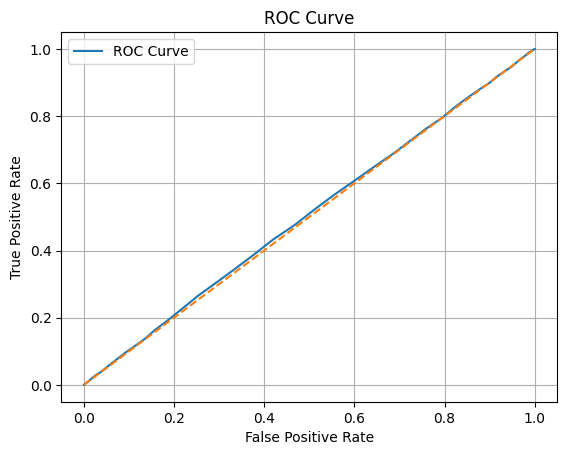

In [22]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_clf, y_proba_clf)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

Regression Model

In [26]:
print("\n--- REGRESSION: Predict Delay Minutes ---")
X_reg = df_model.drop(columns=["Delay_Minutes"])
y_reg = df_model["Delay_Minutes"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)


--- REGRESSION: Predict Delay Minutes ---


In [27]:
# Regression Metrics
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))

MAE: 21.498559
RMSE: 35.462065273472156
R² Score: 0.6330859125393671
